# EDA

In [1]:
import os
import numpy as np
import tensorflow as tf
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt
import glob

In [2]:
df = pd.read_csv('./CPSC2018/REFERENCE.csv')
df.head()

,Recording,First_label,Second_label,Third_label
0,A0001,5,NaN,NaN
1,A0002,1,NaN,NaN
2,A0003,2,NaN,NaN
3,A0004,2,NaN,NaN
4,A0005,7,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6877 entries, 0 to 6876
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Recording     6877 non-null   object 
 1   First_label   6877 non-null   int64  
 2   Second_label  477 non-null    float64
 3   Third_label   6 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 215.0+ KB


In [4]:
def autolabel(rects):
    for idx,rect in enumerate(bar_plot):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                bar_label[idx],
                ha='center', va='bottom', rotation=0)

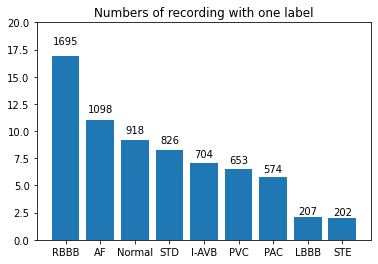

In [5]:
label_1 = df.First_label.value_counts().rename(index={1: "Normal", 2: "AF", 3: "I-AVB", 4: "LBBB", 5: "RBBB", 6: "PAC", 7: "PVC", 8: "STD", 9: "STE"})
fig, ax = plt.subplots()
bar_x = [1,2,3,4,5,6,7,8,9]
bar_height = label_1.values/100
bar_tick_label = label_1.index
bar_label = label_1.values
bar_plot = plt.bar(bar_x,bar_height,tick_label=bar_tick_label)
autolabel(bar_plot)
plt.rcParams["figure.figsize"] = (10,5)
plt.ylim(0,20)
plt.title("Numbers of recording with one label")
plt.show()

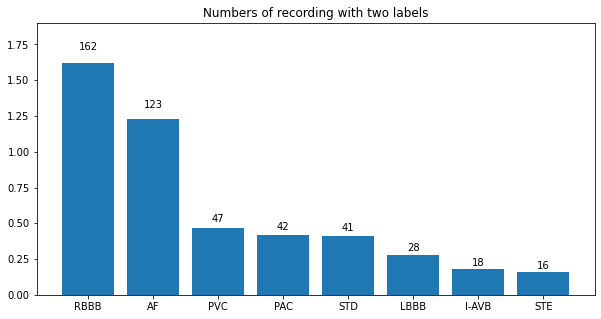

In [6]:
label_2 = df.Second_label.value_counts().rename(index={2: "AF", 3: "I-AVB", 4: "LBBB", 5: "RBBB", 6: "PAC", 7: "PVC", 8: "STD", 9: "STE"})
fig, ax = plt.subplots()
bar_x = [1,2,3,4,5,6,7,8]
bar_height = label_2.values/100
bar_tick_label = label_2.index
bar_label = label_2.values
bar_plot = plt.bar(bar_x,bar_height,tick_label=bar_tick_label)
autolabel(bar_plot)
plt.rcParams["figure.figsize"] = (10,3)
plt.ylim(0, 1.9)
plt.title("Numbers of recording with two labels")
plt.show()

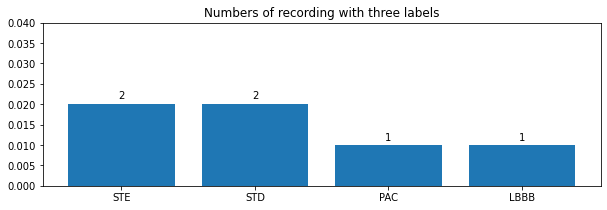

In [7]:
label_3 = df.Third_label.value_counts().rename(index={4: "LBBB", 6: "PAC", 8: "STD", 9: "STE"})
fig, ax = plt.subplots()
bar_x = [1,2,3,4]
bar_height = label_3.values/100
bar_tick_label = label_3.index
bar_label = label_3.values
bar_plot = plt.bar(bar_x,bar_height,tick_label=bar_tick_label)
autolabel(bar_plot)
plt.rcParams["figure.figsize"] = (10, 3)
plt.ylim(0, 0.04)
plt.title("Numbers of recording with three labels")
plt.show()

In [8]:
df.Second_label.value_counts()

5.0    162
2.0    123
7.0     47
6.0     42
8.0     41
4.0     28
3.0     18
9.0     16
Name: Second_label, dtype: int64

In [9]:
df.Third_label.value_counts()

9.0    2
8.0    2
6.0    1
4.0    1
Name: Third_label, dtype: int64

In [10]:
#1: "Normal", 2: "AF", 3: "I-AVB", 4: "LBBB", 5: "RBBB", 6: "PAC", 7: "PVC", 8: "STD", 9: "STE"
Normal = df.loc[df['First_label'] == 1].head(1).iloc[0, 0]
AF = df.loc[df['First_label'] == 2].head(1).iloc[0, 0]
IAVB = df.loc[df['First_label'] == 3].head(1).iloc[0, 0]
LBBB = df.loc[df['First_label'] == 4].head(1).iloc[0, 0]
RBBB = df.loc[df['First_label'] == 5].head(1).iloc[0, 0]
PAC = df.loc[df['First_label'] == 6].head(1).iloc[0, 0]
PVC = df.loc[df['First_label'] == 7].head(1).iloc[0, 0]
STD = df.loc[df['First_label'] == 8].head(1).iloc[0, 0]
STE = df.loc[df['First_label'] == 9].head(1).iloc[0, 0]
print(Normal, AF, IAVB, LBBB, RBBB, PAC, PVC, STD, STE)

A0002 A0003 A0039 A0011 A0001 A0047 A0005 A0008 A0021


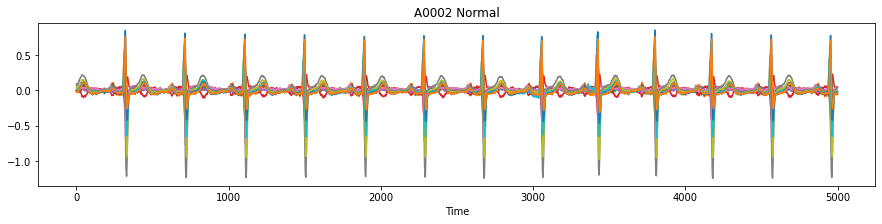

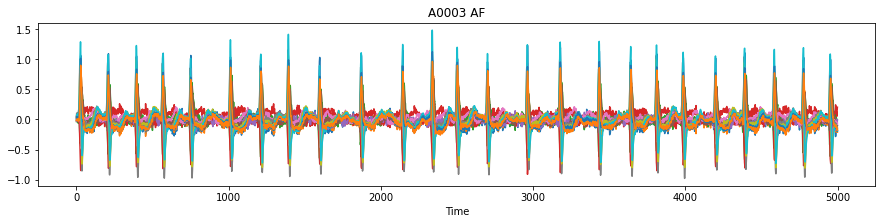

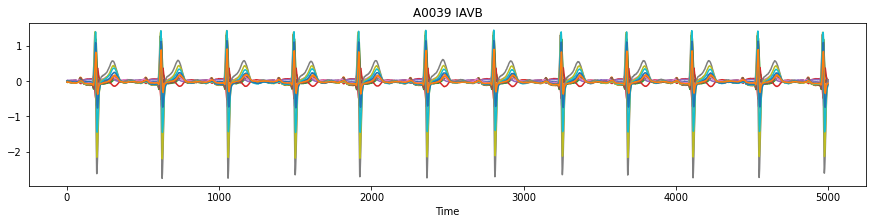

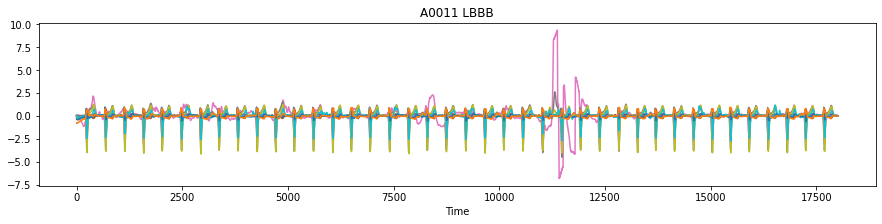

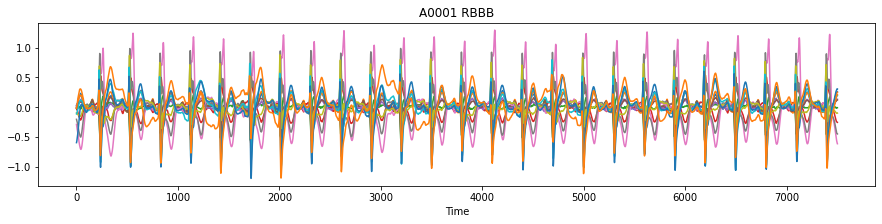

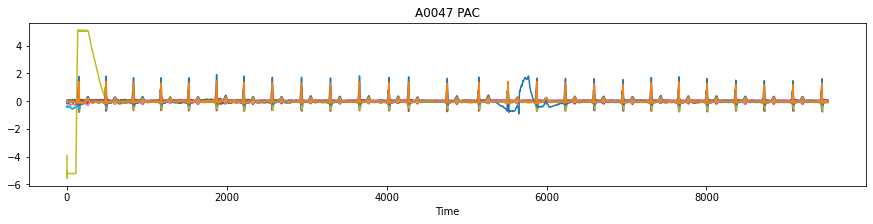

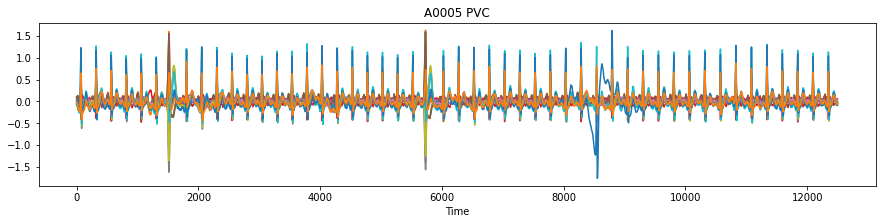

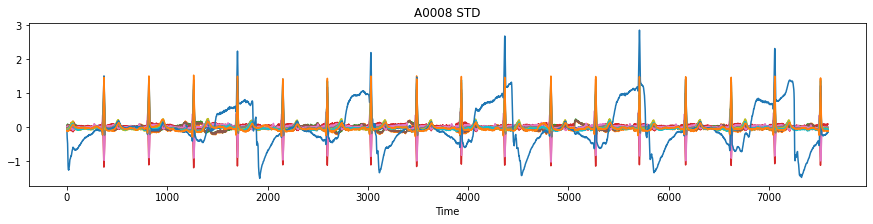

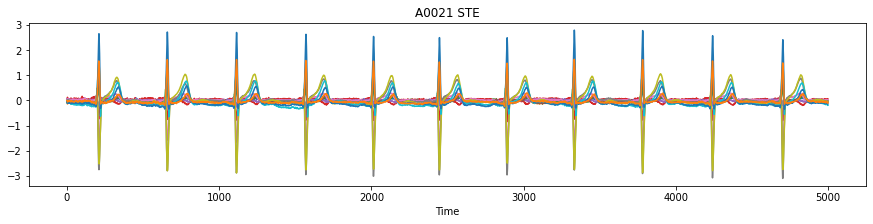

In [11]:
label = pd.array([Normal, AF, IAVB, LBBB, RBBB, PAC, PVC, STD, STE], dtype=str)
label_name = pd.array(["Normal", "AF", "IAVB", "LBBB", "RBBB", "PAC", "PVC", "STD", "STE"], dtype=str)
i = 0
for i in range(len(label)):        
    path = os.path.join('./CPSC2018/' + label[i] + ".mat")
    ecg = sio.loadmat(path)['ECG'][0][0][2][:, : ].T 
    plt.rcParams["figure.figsize"] = (15,3)
    fig = plt.figure(frameon=False)    
    plt.plot(ecg)  
    plt.title(label[i] + " " + label_name[i])
    plt.xlabel("Time")    
    i += 1
